图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/USAFlu
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/SouthChinaFlu
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/NorthChinaFlu
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/Weekly
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/PositiveRate
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/NorthChinaILI
图像已保存至: /data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/SouthChinaILI


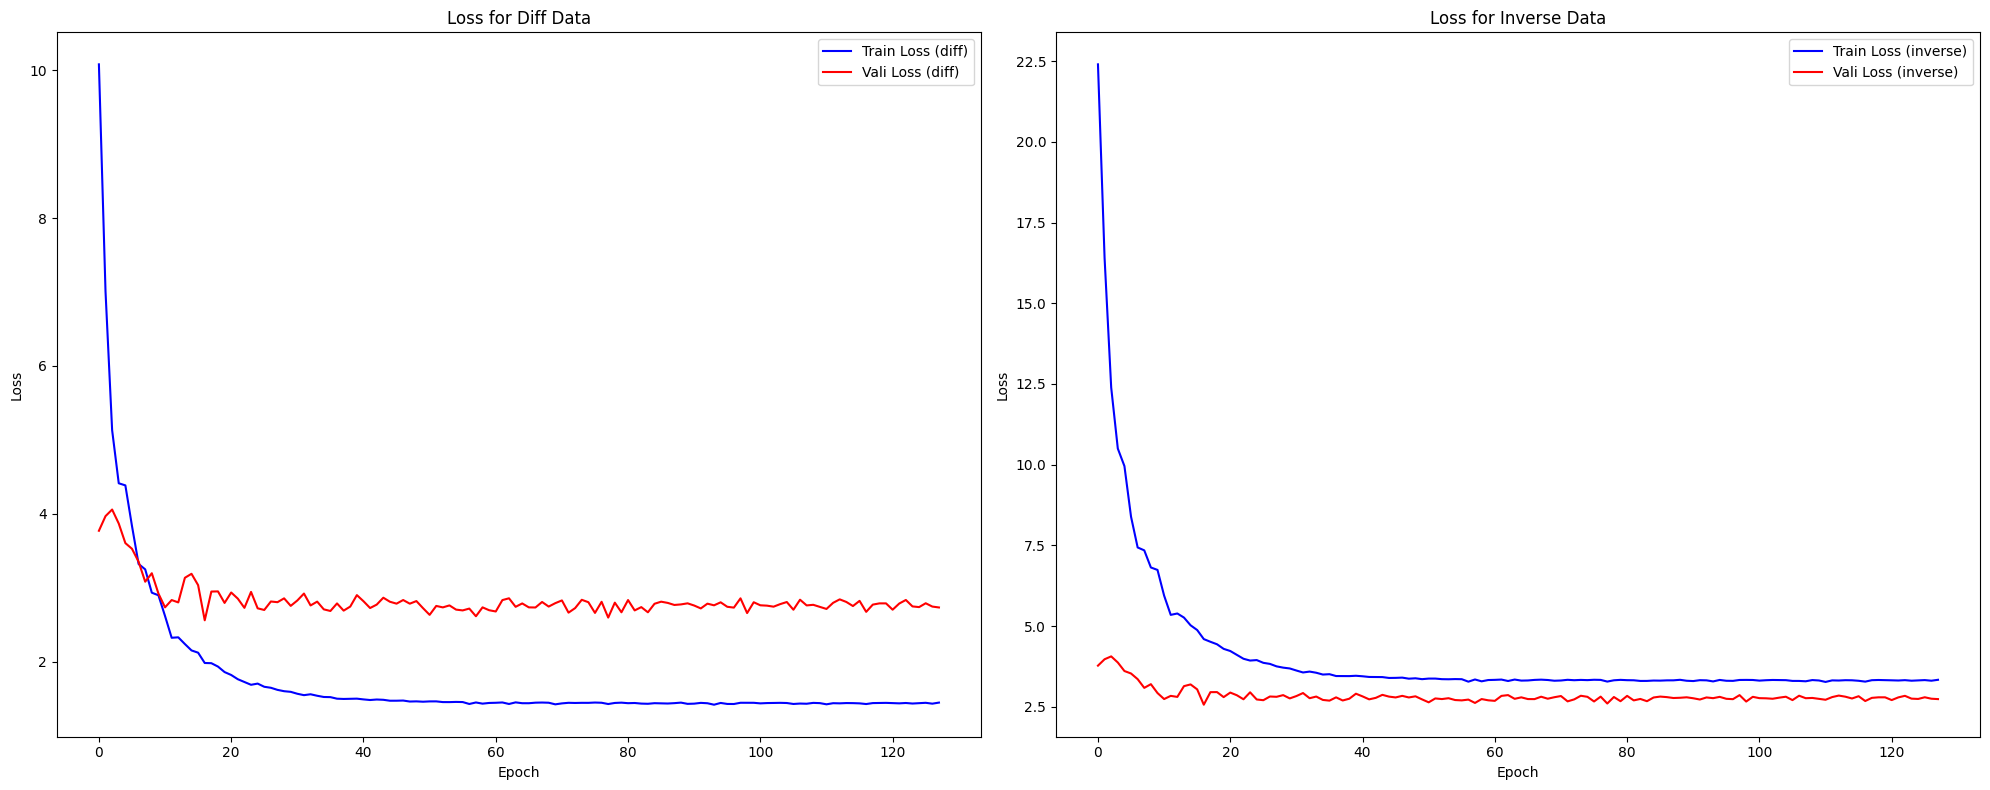

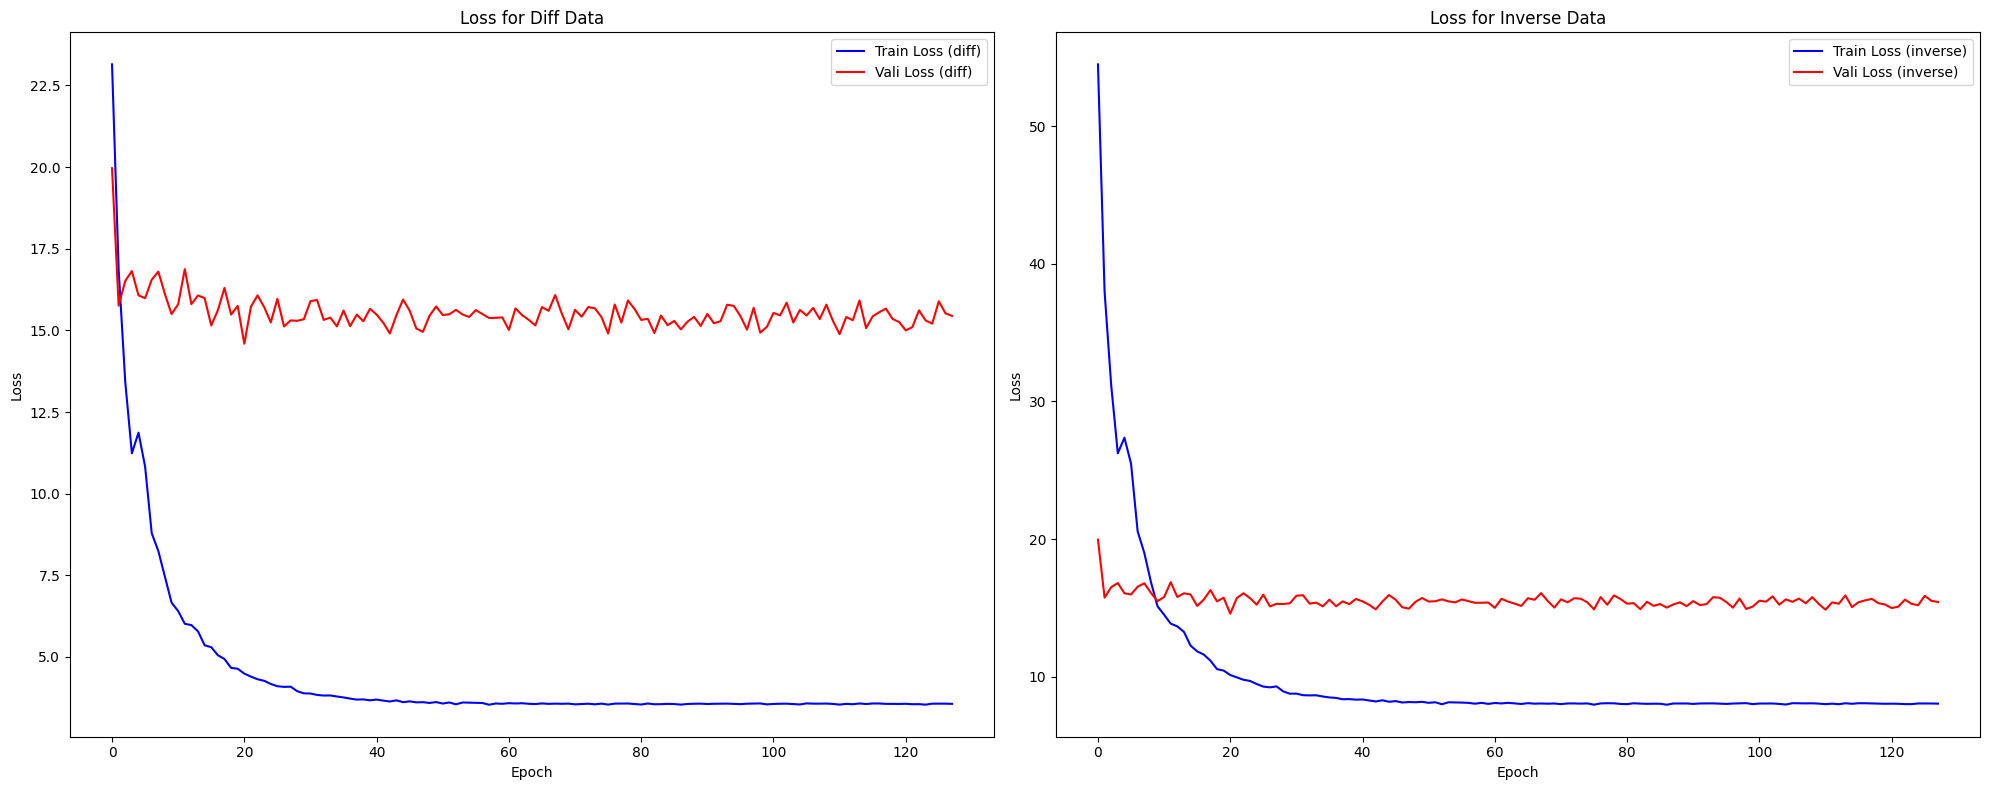

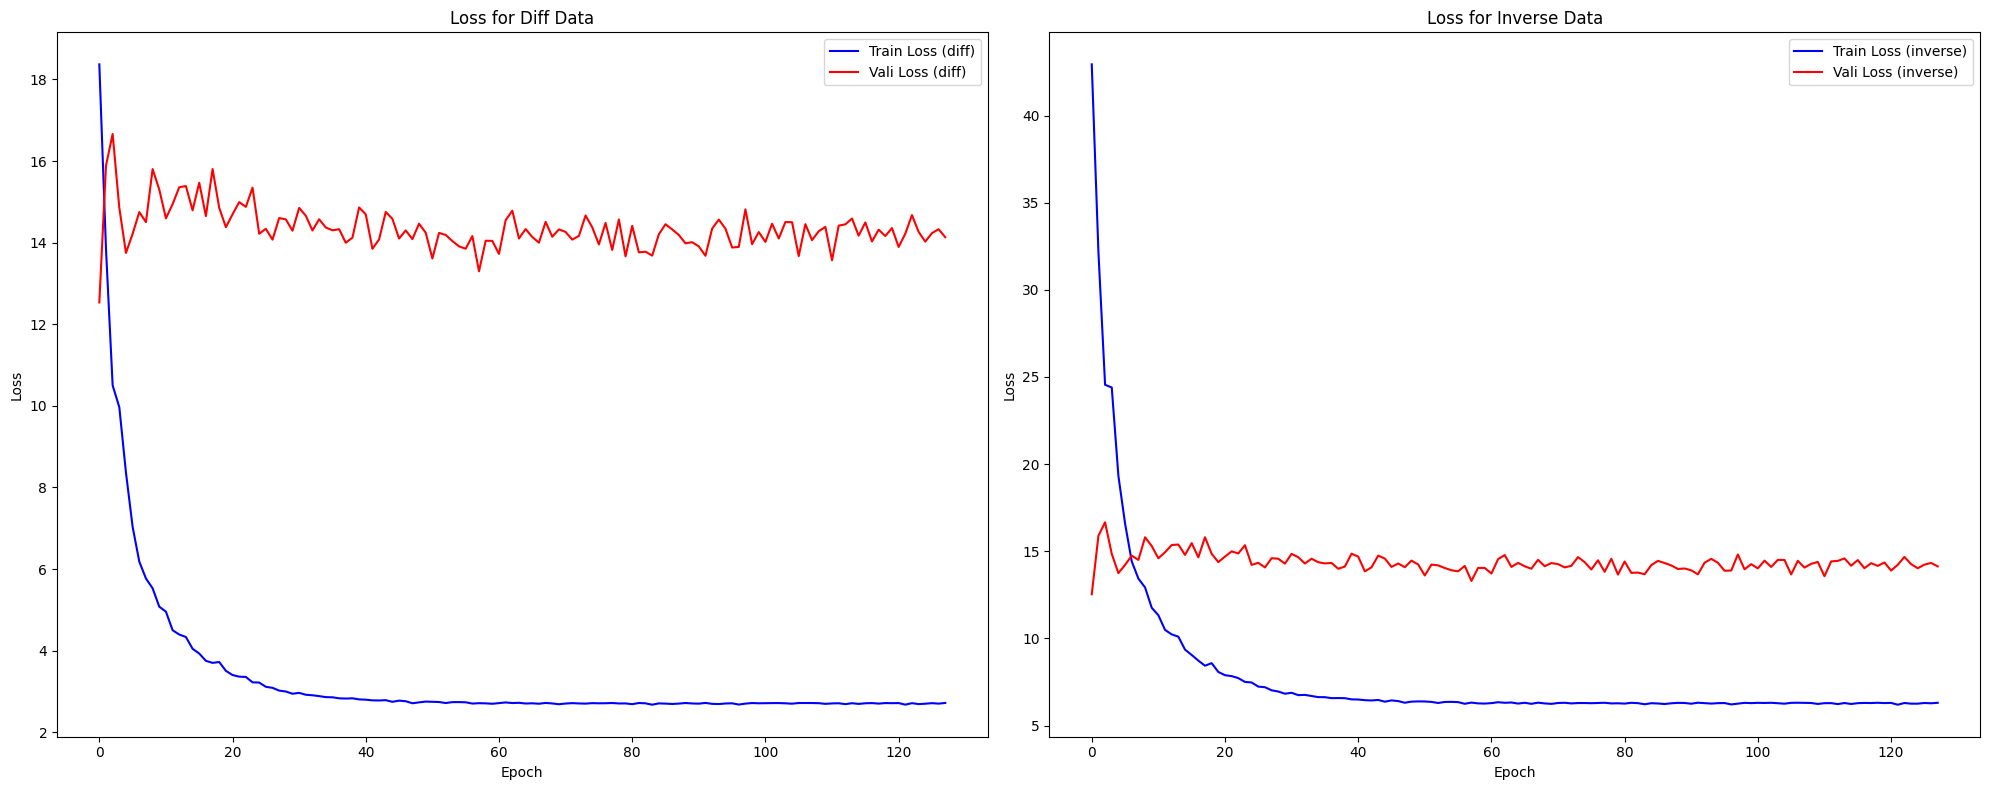

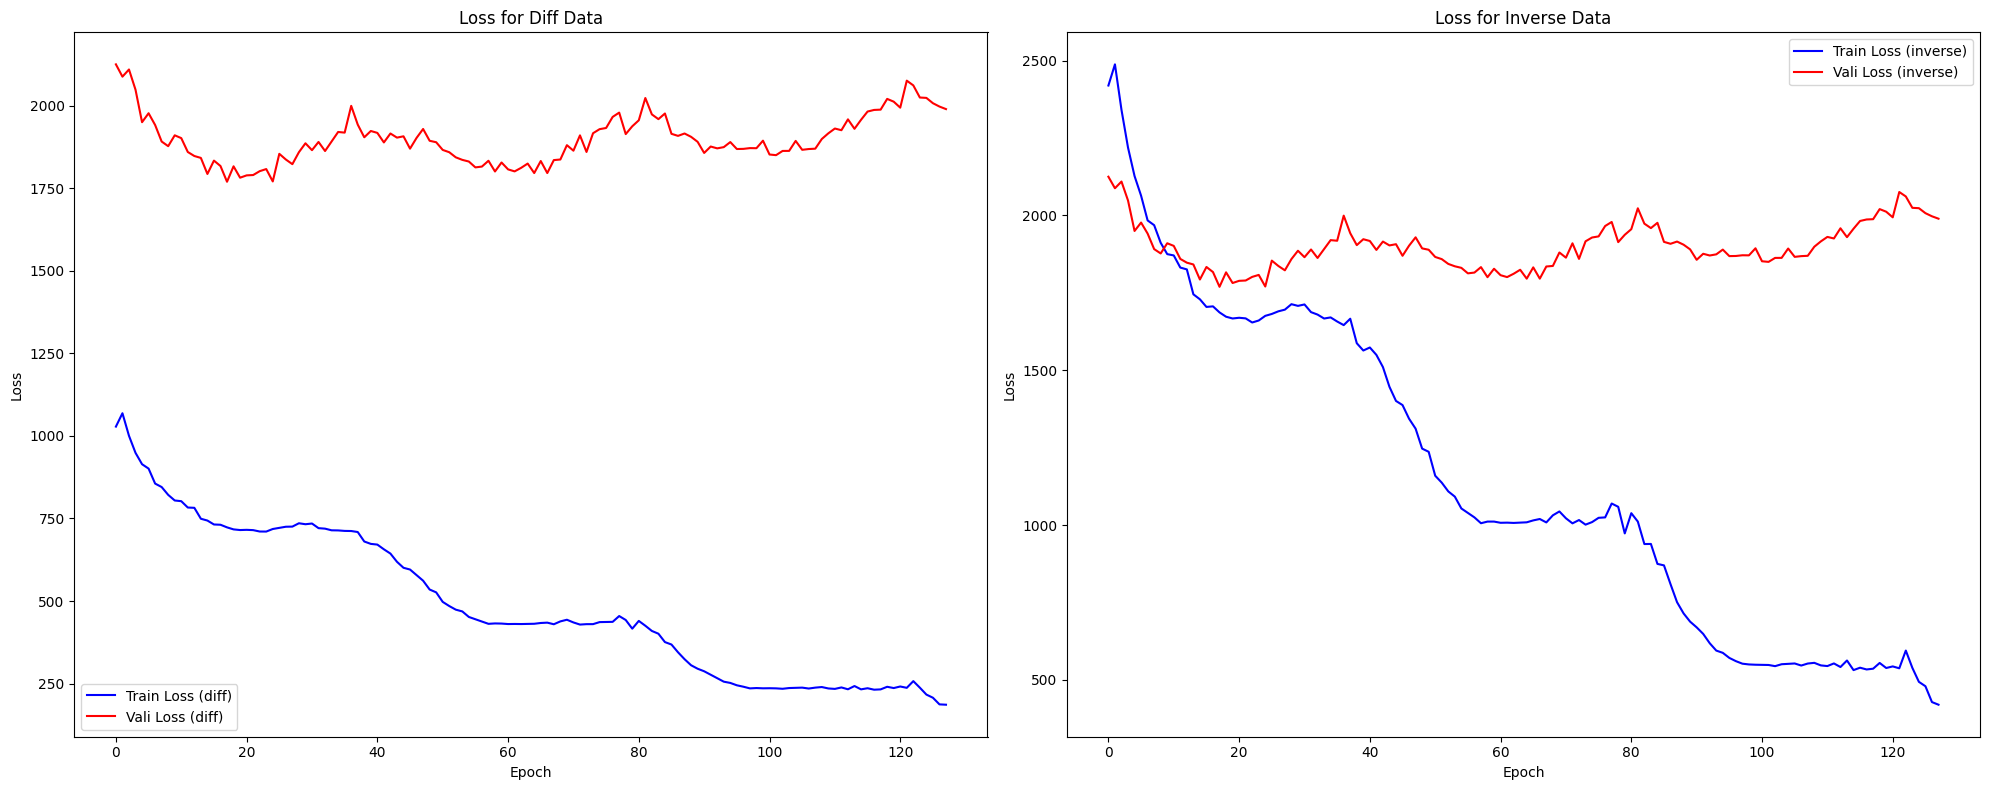

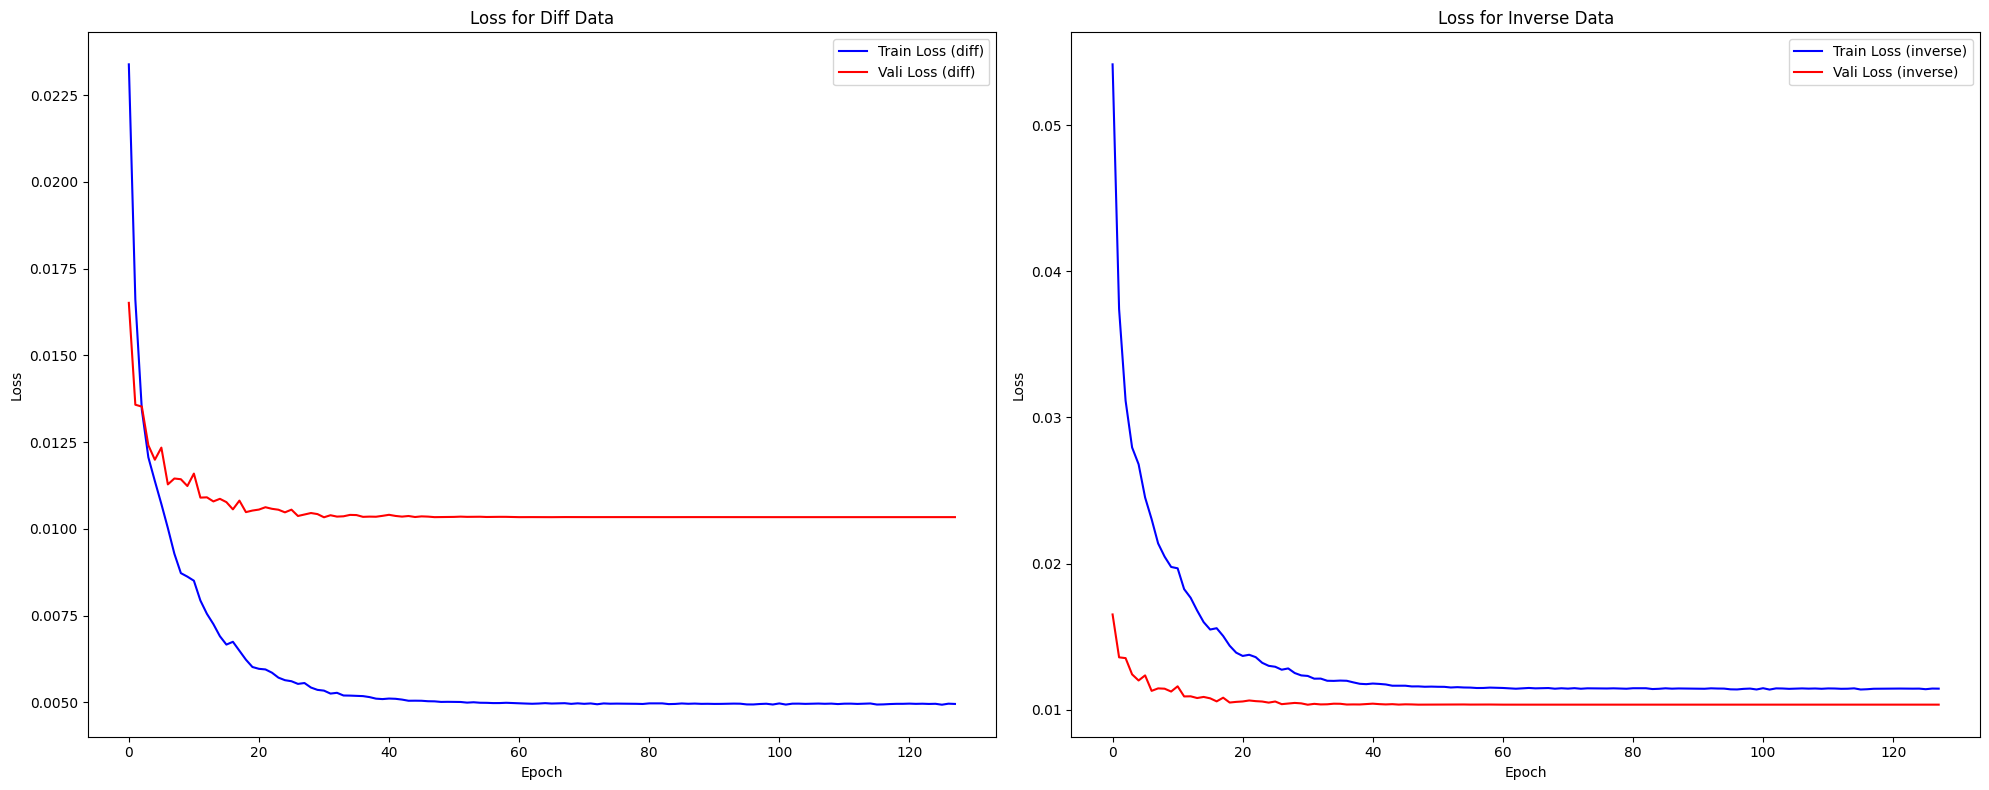

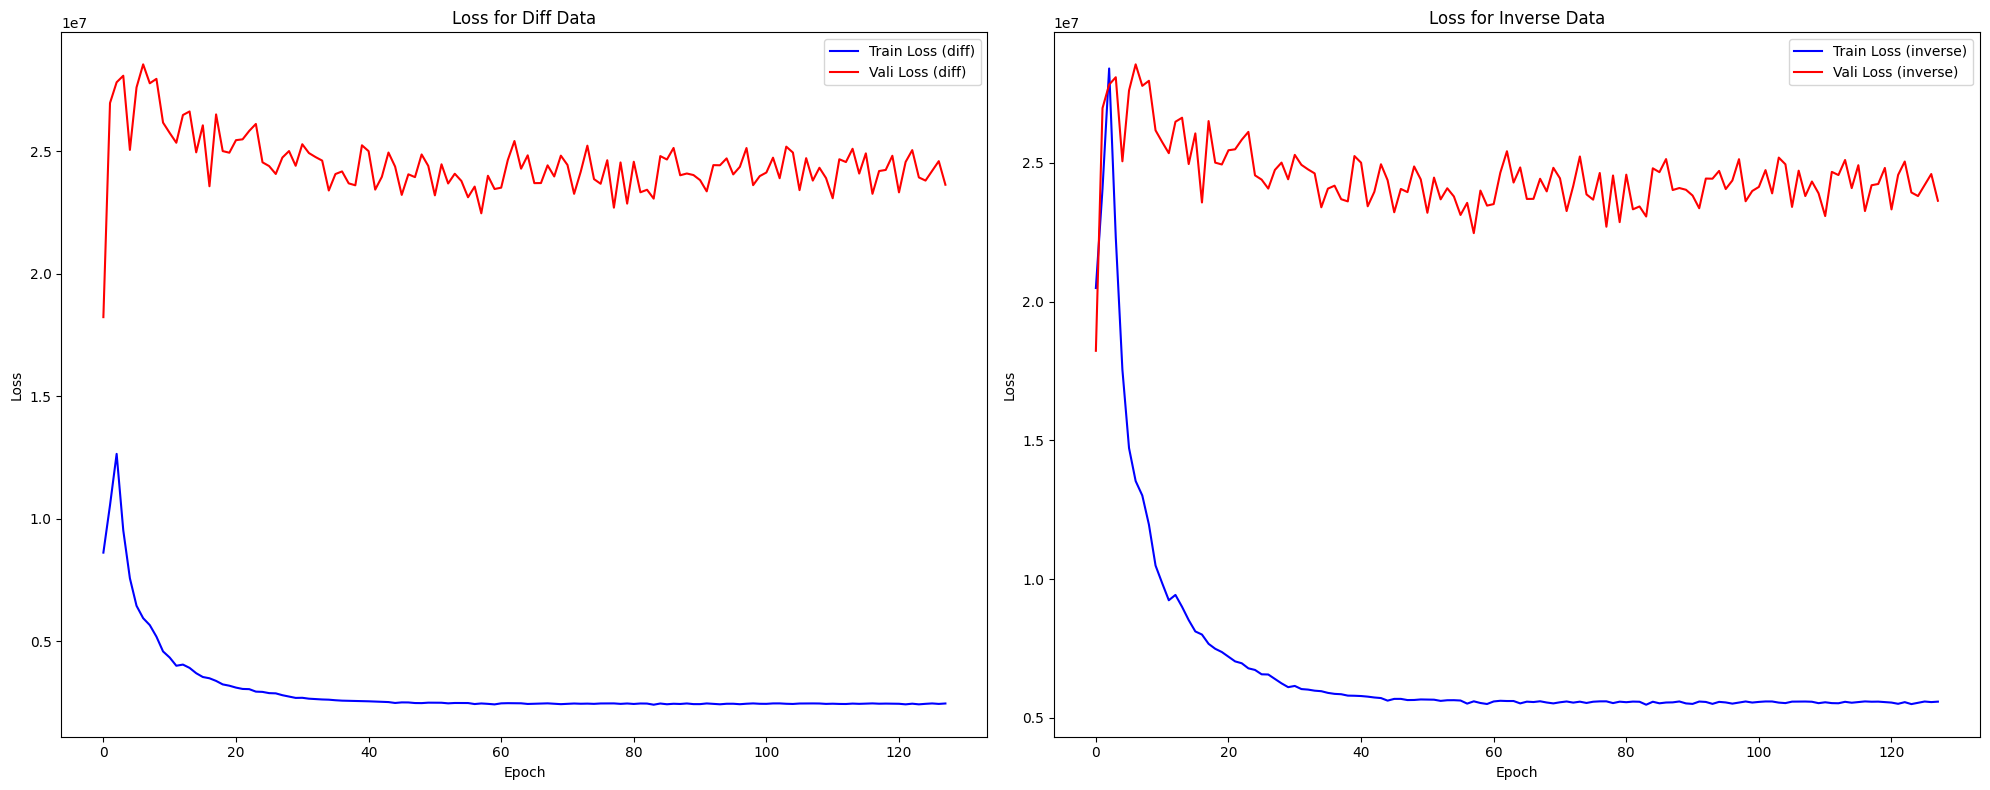

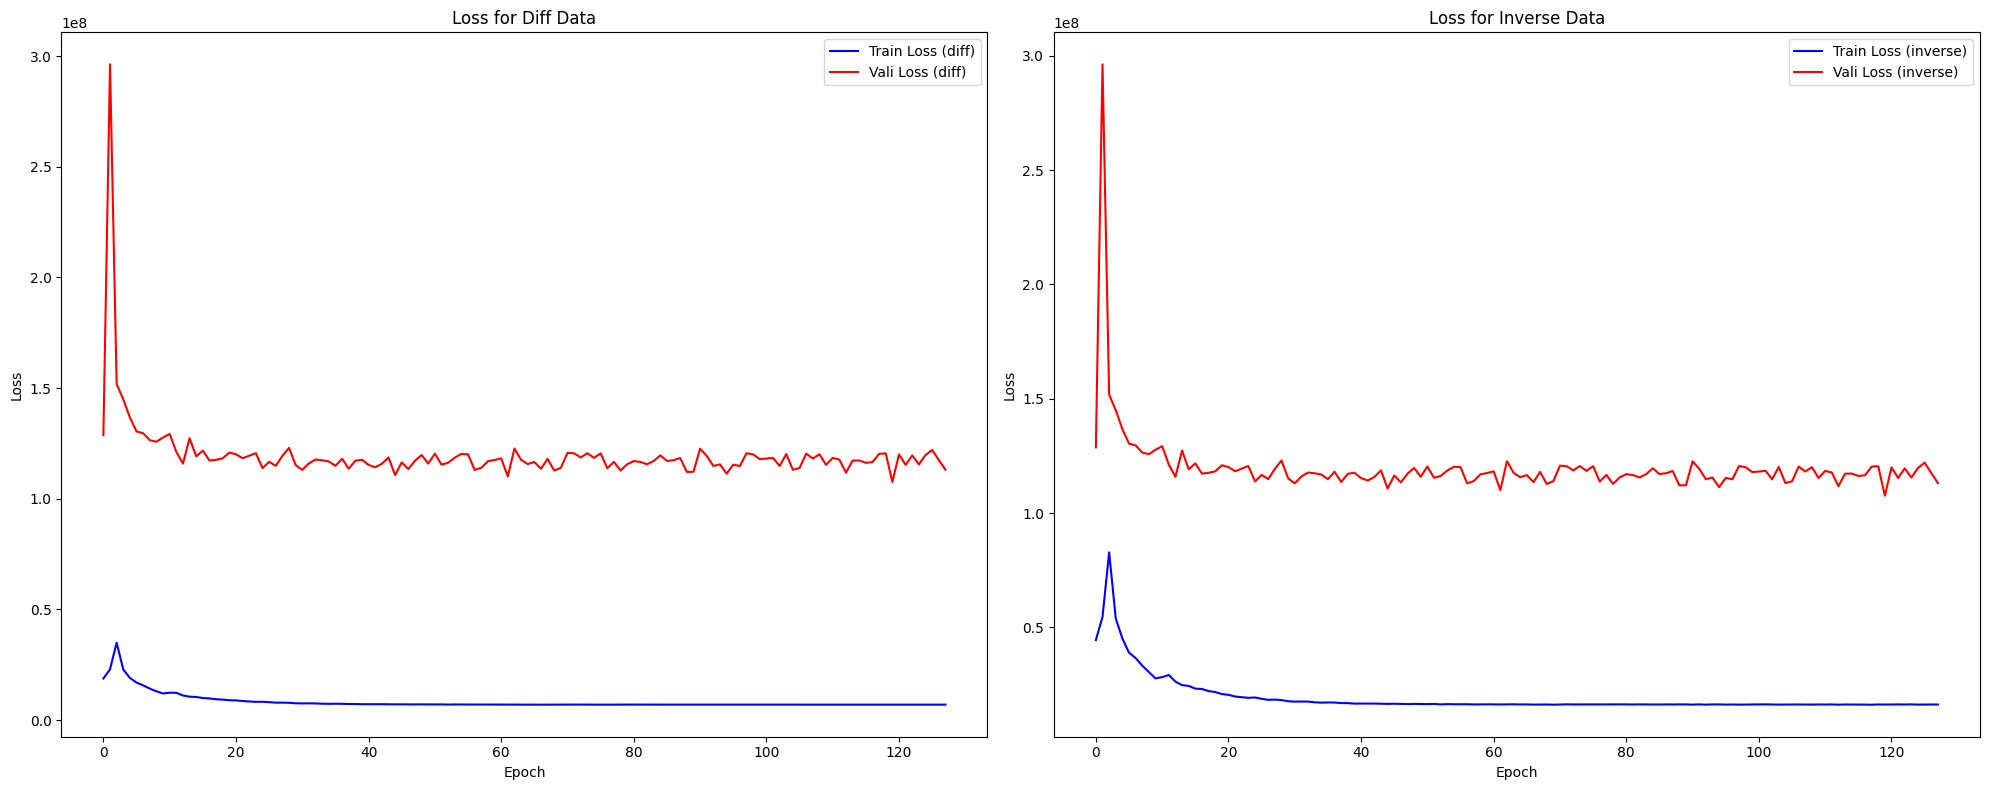

In [31]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# 解析日志文件，提取损失
def parse_log(file_path):
    train_losses = []
    vali_losses = []

    # 创建一个长度为768的labels，前128个为0，接下来的128个为1，依此类推
    labels = np.zeros(768)
    for i in range(6):
        labels[i*128:(i+1)*128] = i

    with open(file_path, 'r') as f:
        lines = f.readlines()
        for i in range(len(lines)):
            if 'Train Loss' in lines[i]:
                # 使用正则表达式提取train loss, vali loss
                match = re.search(r'Epoch: (\d+), Steps: \d+ \| Train Loss: ([\d.]+) Vali Loss: ([\d.]+)', lines[i])
                if match:
                    train_loss = float(match.group(2))
                    vali_loss = float(match.group(3))
                    train_losses.append(train_loss)
                    vali_losses.append(vali_loss)

    return train_losses, vali_losses, labels

# 绘制损失曲线
def plot_loss(train_losses, vali_losses, labels, save_path=None):
    # 将train_losses和vali_losses按照标签分别分组
    train_losses_diff = (np.array(train_losses)[labels==0] +  np.array(train_losses)[labels==2] + np.array(train_losses)[labels==4]) / 3
    train_losses_inverse = (np.array(train_losses)[labels==1] +  np.array(train_losses)[labels==3] + np.array(train_losses)[labels==5] / 3)

    vali_losses_diff = (np.array(vali_losses)[labels==0] +  np.array(vali_losses)[labels==2] + np.array(vali_losses)[labels==4]) / 3
    vali_losses_inverse = (np.array(vali_losses)[labels==1] +  np.array(vali_losses)[labels==3] + np.array(vali_losses)[labels==5]) / 3

    # 绘制损失曲线
    plt.figure(figsize=(20, 8))

    # 标签为0, 2, 4的损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(train_losses_diff, label="Train Loss (diff)", color='b')
    plt.plot(vali_losses_diff, label="Vali Loss (diff)", color='r')
    plt.title('Loss for Diff Data')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # 标签为1, 3, 5的损失曲线
    plt.subplot(1, 2, 2)
    plt.plot(train_losses_inverse, label="Train Loss (inverse)", color='b')
    plt.plot(vali_losses_inverse, label="Vali Loss (inverse)", color='r')
    plt.title('Loss for Inverse Data')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"图像已保存至: {save_path}")
    else:
        plt.show()

# 读取日志文件并绘制图形
log_dirs = [
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/USAFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/Weekly',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/PositiveRate',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaILI',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaILI'
]

for log_dir in log_dirs:
    # log_path = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu/'  # 替换为实际的文件路径
    base_path = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/visual_of_loss/'
    file_name = 'Llama2_relu_before_52.log'
    log_file = os.path.join(log_dir, file_name)

    save_name = os.path.basename(log_dir)
    save_file = os.path.join(base_path, save_name)

    train_losses, vali_losses, labels = parse_log(log_file)
    plot_loss(train_losses, vali_losses, labels, save_path=save_file)
